In [681]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style('white')
pl.style.use('seaborn-whitegrid')
%matplotlib inline

In [682]:
column_names=['user_id','item_id','rating','timestamp']

In [683]:
df=pd.read_csv('u.data',sep='\t',names=column_names)
movie_title=pd.read_csv('Movie_Id_Titles')

In [684]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [685]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [686]:
df=pd.merge(df,movie_title,on='item_id')

In [687]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [688]:
bar=df.groupby('title')['rating'].count().sort_values(ascending=False)
bar

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [689]:

ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [690]:
rating=ratings.reset_index()

In [691]:
ratings['No of Ratings']=df.groupby('title')['rating'].count()

In [692]:
ratings.head()

,rating,No of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


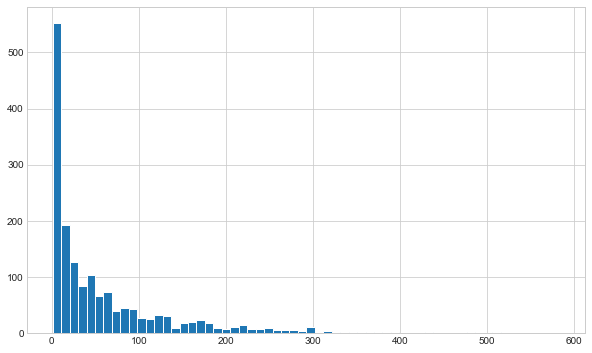

In [693]:
pl.figure(figsize=(10,6))
pl.hist(ratings['No of Ratings'],bins=60)
pl.show()

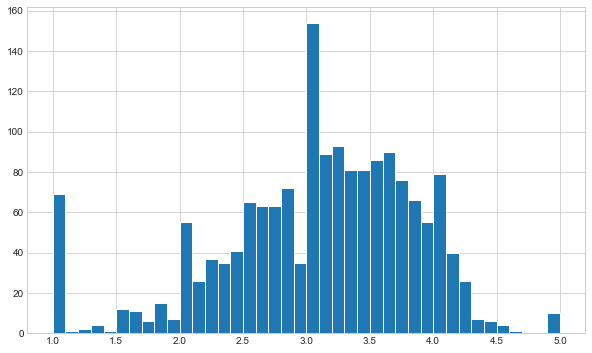

In [694]:
pl.figure(figsize=(10,6))
a=pl.hist(ratings['rating'],bins=40)
pl.show()

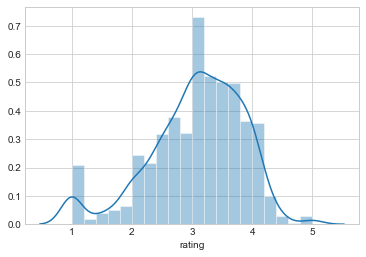

In [695]:
sns.distplot(ratings['rating'],bins=20,hist=True,
            kde=True)

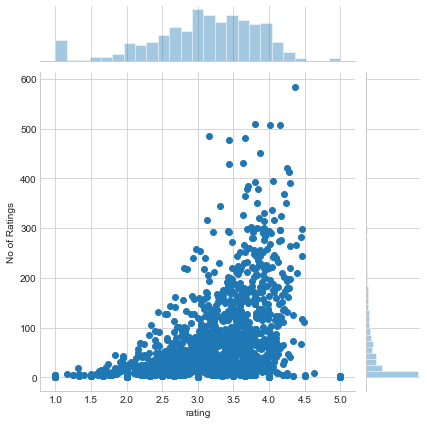

In [718]:
sns.jointplot(data=ratings,x='rating',
             y='No of Ratings', kind='scatter')

In [719]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [697]:
moviemat=df.pivot_table(index='user_id',columns='title',
                       values='rating')

In [698]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [699]:
ratings.sort_values('No of Ratings',ascending=False)

,rating,No of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [700]:
star_war=moviemat['Star Wars (1977)']
liarliar=moviemat['Liar Liar (1997)']
Contact=moviemat['Contact (1997)']
Fargo=moviemat['Fargo (1996)']
Returnofjedi=moviemat['Return of the Jedi (1983)']

In [701]:
star_war

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [702]:
similartostarwars=moviemat.corrwith(star_war)
similartostarwars.sort_values(ascending=False).head(10)

C:\Users\rissu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\rissu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
Outlaw, The (1943)                      1.0
dtype: float64

In [703]:
similartoliar=moviemat.corrwith(liarliar)
similartoliar.sort_values(ascending=False).head(10)

title
Love and Death on Long Island (1997)    1.0
For Ever Mozart (1996)                  1.0
Johnny 100 Pesos (1993)                 1.0
Mina Tannenbaum (1994)                  1.0
Liar Liar (1997)                        1.0
Legal Deceit (1997)                     1.0
Bonheur, Le (1965)                      1.0
Moonlight and Valentino (1995)          1.0
Stranger, The (1994)                    1.0
Crossfire (1947)                        1.0
dtype: float64

In [704]:
Contact=moviemat.corrwith(star_war)
Contact.sort_values(ascending=False).head(10)

title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
Outlaw, The (1943)                      1.0
dtype: float64

In [705]:
Fargo=moviemat.corrwith(star_war)
Fargo.sort_values(ascending=False).head(10)

title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
Outlaw, The (1943)                      1.0
dtype: float64

In [706]:
Returnofjedi=moviemat.corrwith(star_war)
Returnofjedi.sort_values(ascending=False).head(10)

title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
Outlaw, The (1943)                      1.0
dtype: float64

In [707]:
corr_starwars=pd.DataFrame(similartostarwars,columns=['Corr'])
corr_starwars.dropna(inplace=True)

In [708]:
corr_starwars.head()

,Corr
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [709]:
corr_starwars.sort_values('Corr',ascending=False).head()

,Corr
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [710]:
corr_starwars=corr_starwars.join(ratings['No of Ratings'])

In [711]:
corr_starwars

,Corr,No of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [712]:
pd.merge(corr_starwars,ratings['No of Ratings'],on='title')

,Corr,No of Ratings_x,No of Ratings_y
title,,,
'Til There Was You (1997),0.872872,9,9
1-900 (1994),-0.645497,5,5
101 Dalmatians (1996),0.211132,109,109
12 Angry Men (1957),0.184289,125,125
187 (1997),0.027398,41,41
...,...,...,...
Young Guns (1988),0.186377,101,101
Young Guns II (1990),0.228615,44,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41,41


In [713]:
a=corr_starwars[corr_starwars['No of Ratings']>100].sort_values('Corr',ascending=False)
a

,Corr,No of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [714]:
a=a.reset_index()

<BarContainer object of 30 artists>

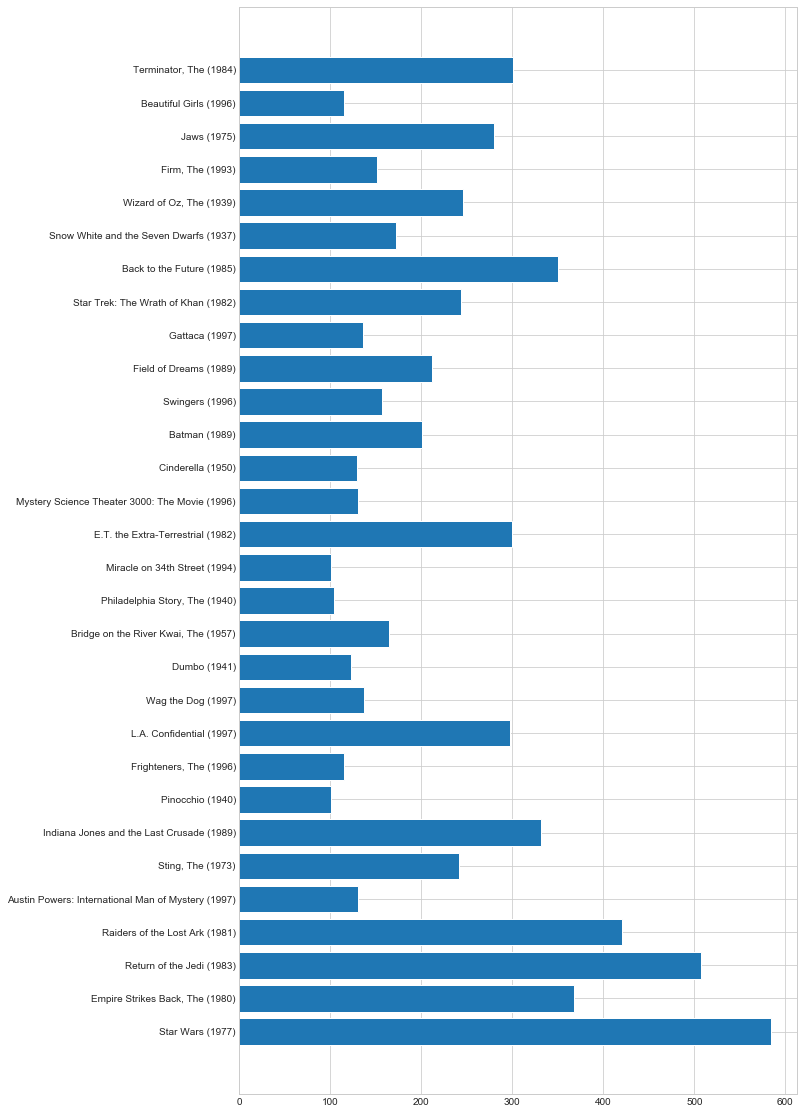

In [715]:
pl.figure(figsize=(10,20))
pl.barh(b,a['No of Ratings'][:30])

In [716]:
b=a['title'][:30]

In [717]:
b=list(b)